In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import csv

In [3]:
export_filename = './Best Modes/24 Cavities/N24r127_5_p5_bestmodes.csv' 
numbers = np.loadtxt('./Modes/24 Cavities/N24r127_5_p5_modes.csv', dtype=float,delimiter=',', usecols=(1, 2),unpack=False)
numbers = numbers[numbers[:,0].argsort()] 
# print(numbers)
real = numbers[:,0].tolist()
print(real)

[0.315706219, 0.315751545, 0.315751545, 0.315830655, 0.316041272, 0.316216081, 0.316216081, 0.316468318, 0.316668797, 0.316997917, 0.316997917, 0.317356027, 0.317602661, 0.317966686, 0.317966686, 0.318282171, 0.318591589, 0.318823251, 0.318823251, 0.318983022, 0.319300228, 0.319358211, 0.319358211, 0.319396423]


In [4]:
def find_closest_numbers(numbers):
    modes = [[None, None, None, None, None, None, None,
          None, None, None, None] for _ in range(100)]  # Initialize modes with placeholders

    i = 0
    for row_idx, row in enumerate(numbers):
        central = row  # Get the central number from the first column
        smaller = numbers[:row_idx]
        larger = numbers[row_idx+1:]

        for small in smaller:
            for large in larger:
                large_diff = large[0]-central[0]
                small_diff = central[0]-small[0]
                if (abs(large_diff-small_diff) < 5e-5 and np.mean([large_diff, small_diff]) > 5e-4):
                    avg_diff = np.mean([small_diff, large_diff])
                    rel_diff = abs(large_diff-small_diff)
                    Rscore = avg_diff/rel_diff
                    
                    modes[i][0] = small[0]
                    modes[i][1] = central[0]
                    modes[i][2] = large[0]
                    modes[i][3] = small_diff
                    modes[i][4] = large_diff
                    modes[i][5] = avg_diff
                    modes[i][6] = rel_diff
                    modes[i][7] = Rscore
                    modes[i][8] = small[1]
                    modes[i][9] = central[1]
                    modes[i][10] = large[1]
                    i += 1
    return modes

modes = [[None, None, None, None, None, None, None,
          None, None, None, None] for _ in range(100)]  # Initialize modes with placeholders

modes = find_closest_numbers(numbers)
modes = [row for row in modes if None not in row or row.index(None) > 0]

print([row[:3] for row in modes])
# print(len(modes))

headers = ["Re small", "Re central", "Re large", "Small diff", 
           "Large diff", "Avg diff", "Rel diff", "R-score", 
           "Im small", "Im central", "Im large", "O-score"]
# Write modes array to a CSV file
with open(export_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(headers)  # Write headers
    writer.writerows(modes)   # Write data

[[0.315706219, 0.316668797, 0.317602661], [0.315751545, 0.316668797, 0.317602661], [0.315751545, 0.316668797, 0.317602661], [0.315706219, 0.316997917, 0.318282171], [0.315751545, 0.316997917, 0.318282171], [0.315751545, 0.316997917, 0.318282171], [0.316041272, 0.316997917, 0.317966686], [0.316041272, 0.316997917, 0.317966686], [0.315706219, 0.316997917, 0.318282171], [0.315751545, 0.316997917, 0.318282171], [0.315751545, 0.316997917, 0.318282171], [0.316041272, 0.316997917, 0.317966686], [0.316041272, 0.316997917, 0.317966686], [0.315706219, 0.317356027, 0.318983022], [0.315751545, 0.317356027, 0.318983022], [0.315751545, 0.317356027, 0.318983022], [0.316468318, 0.317356027, 0.318282171], [0.315830655, 0.317602661, 0.319358211], [0.315830655, 0.317602661, 0.319358211], [0.315830655, 0.317602661, 0.319396423], [0.316216081, 0.317602661, 0.318983022], [0.316216081, 0.317602661, 0.318983022], [0.316668797, 0.317966686, 0.319300228], [0.316997917, 0.317966686, 0.318983022], [0.316997917, 0

In [2]:
L1 = [
    4.91886604508036E-09 - 2.5450417261713E-09j,
    -0.0384514275845781 - 8.88565970150884E-06j,
    0.0939638260620342 + 0.0000106079584903593j,
    -0.1572623174377 - 6.08109539032564E-06j,
    0.233642034244225 + 2.69132338009958E-06j,
    -0.329273280347313 - 1.30451205393456E-15j,
    0.322339439462357 + 0.0000751069850303543j,
    -0.329273279173533 - 6.0719279604271E-10j,
    0.233642031376109 + 2.69280751430401E-06j,
    -0.157262312637705 - 6.08357966404293E-06j,
    0.0939638189307988 + 0.0000106116495286607j,
    -0.0384514175344607 - 8.89086162225023E-06j,
    -4.92083946077997E-09 + 2.54504431971539E-09j,
    0.0384514275865712 + 0.0000088856597030458j,
    -0.0939638260635226 - 0.0000106079584892074j,
    0.157262317438995 + 0.0000060810953893542j,
    -0.23364203424547 - 2.69132338109879E-06j,
    0.329273280348658,
    -0.322339439463505 - 0.0000751069850321584j,
    0.329273279174938 + 6.07191352752778E-10j,
    -0.233642031377378 - 2.69280751513668E-06j,
    0.157262312638959 + 6.08357966290496E-06j,
    -0.0939638189322558 - 0.0000106116495273492j,
    0.0384514175364393 + 8.89086162377331E-06j
]

L2 = [
    -0.322339424346711 - 0.0000751258316666198j,
    0.329273242610993,
    -0.233642057930612 - 2.71668906956513E-06j,
    0.157262360104607 + 6.11054681920465E-06j,
    -0.0939638620038003 - 0.0000106288222657003j,
    0.0384514425882524 + 8.89073198467958E-06j,
    -9.50702034694457E-09 + 4.83420155977976E-09j,
    -0.0384514231675671 - 8.90061289132802E-06j,
    0.0939638482234532 + 0.0000106358332979065j,
    -0.157262350829212 - 6.11526565391652E-06j,
    0.233642052388526 + 2.71950819547006E-06j,
    -0.329273240342987 - 1.15337035061502E-09j,
    0.322339424346726 + 0.0000751258316664741j,
    -0.329273242610936 - 9.22872889219661E-16j,
    0.233642057930601 + 2.71668907075862E-06j,
    -0.157262360104673 - 6.11054681940934E-06j,
    0.0939638620039914 + 0.0000106288222647549j,
    -0.038451442588555 - 8.89073198384518E-06j,
    9.5073305091981E-09 - 4.83420148752323E-09j,
    0.0384514231672086 + 8.90061289053178E-06j,
    -0.0939638482231638 - 0.0000106358332970305j,
    0.157262350828869 + 6.11526565421836E-06j,
    -0.233642052388235 - 2.71950819682315E-06j,
    0.329273240342828 + 1.15337145389916E-09j
]

M1 = [
    -1.49102250368674E-07 + 8.259679032853E-08j,
    0.256533414563499 + 0.0000250385504993178j,
    -0.200288849042113 + 0.0000092873951674094j,
    -0.171917789538408 - 7.83684311866928E-06j,
    0.273031810681663 + 1.22041082850632E-07j,
    0.0563987277917334 + 7.73326188226176E-06j,
    -0.271263754456031 - 0.0000729733818419231j,
    0.0563984458072004 + 7.88953332562375E-06j,
    0.273032030824225,
    -0.17191760056998 - 7.94157931373329E-06j,
    -0.200289149145939 + 9.45374618460671E-06j,
    0.256533352568136 + 0.0000250729040733311j,
    1.49102452367712E-07 - 8.25967898962971E-08j,
    -0.25653341456367 - 0.0000250385505088796j,
    0.200288849042199 - 9.28739514789723E-06j,
    0.171917789538696 + 7.83684309713095E-06j,
    -0.273031810681783 - 1.2204106598912E-07j,
    -0.0563987277917864 - 7.73326189007149E-06j,
    0.271263754456155 + 0.0000729733818417983j,
    -0.0563984458073301 - 7.88953331793893E-06j,
    -0.273032030824197 - 1.67366120962243E-14j,
    0.171917600570151 + 7.94157933557693E-06j,
    0.20028914914588 - 0.0000094537462037303j,
    -0.256533352568265 - 0.0000250729040631171j
]

M2 = [
    0.271263783511599 + 0.0000729599984289376j,
    -0.0563984892443283 - 7.84902433701232E-06j,
    -0.273032000657453 + 9.22872889219661E-16j,
    0.171917603292187 + 7.88636971487365E-06j,
    0.200289135766709 - 9.42100759790225E-06j,
    -0.256533329693462 - 0.0000250213606650291j,
    -9.61592949441586E-08 + 5.10013631673515E-08j,
    0.256533369675781 + 0.000025000148003506j,
    -0.200288942222258 + 9.31828795736924E-06j,
    -0.171917725162748 - 7.82169668784617E-06j,
    0.273031858681864 + 7.53590912970503E-08j,
    0.0563986711031036 + 7.75252950587381E-06j,
    -0.27126378351164 - 0.0000729599984290383j,
    0.0563984892443523 + 7.84902433638348E-06j,
    0.273032000657542,
    -0.171917603292281 - 7.88636971484416E-06j,
    -0.200289135766813 + 9.42100759680764E-06j,
    0.2565333296936 + 0.0000250213606659416j,
    9.61592822621427E-08 - 5.10013631177554E-08j,
    -0.256533369675867 - 0.0000250001480043769j,
    0.200288942222253 - 9.31828795642034E-06j,
    0.171917725162825 + 7.82169668772822E-06j,
    -0.273031858681902 - 7.53590920499203E-08j,
    -0.056398671103043 - 7.75252950518339E-06j
]

### Now for the 24 cavity degenerate modes with NNTB:

H1 = [
    0.286345196732885 + 0.0000615594700160431j,
    0.200089198133095 + 9.02432010977381E-06j,
    -0.00570758441651991 + 8.7065058875136E-07j,
    -0.208270117886956 + 0.0000050074224891034j,
    -0.290042732925559 - 9.05072327847533E-12j,
    -0.203553335489208 - 8.63181612029162E-06j,
    -9.92270085726146E-07 - 1.37670016385544E-10j,
    0.20355194875858 + 8.63185928883306E-06j,
    0.290042772489451,
    0.208271561326085 - 5.00756723290779E-06j,
    0.00570959458307863 - 8.70803831649779E-07j,
    -0.200087787393709 - 9.02436783555829E-06j,
    -0.286345196732768 - 0.0000615594700160514j,
    -0.200089198133096 - 0.0000090243201097324j,
    0.00570758441639874 - 8.70650588667239E-07j,
    0.208270117886761 - 5.00742248904918E-06j,
    0.2900427329253 + 9.05079353477611E-12j,
    0.203553335489013 + 8.63181612039137E-06j,
    9.92270079846075E-07 + 1.37670022887507E-10j,
    -0.203551948758429 - 8.63185928888748E-06j,
    -0.290042772489244 - 2.99239799605999E-17j,
    -0.208271561325895 + 0.0000050075672328538j,
    -0.00570959458287298 + 8.70803831536262E-07j,
    0.200087787393901 + 9.02436783545485E-06j
]

H2 = [
    0.285134658227401 + 0.0000786422243203522j,
    -0.141816610477863 - 0.0000109876230020192j,
    -0.147595867515216 - 3.43504830883971E-06j,
    0.291385036970116,
    -0.14759587353157 - 3.43505813464936E-06j,
    -0.141816604599345 - 0.0000109880168631106j,
    0.285134651631966 + 0.0000786398884207627j,
    -0.14181660460086 - 0.0000109880168638036j,
    -0.147595873530057 - 3.43505813403294E-06j,
    0.291385036970055 + 2.81892564846231E-17j,
    -0.147595867516552 - 3.43504830950238E-06j,
    -0.141816610476474 - 0.0000109876230013081j,
    0.285134658227455 + 0.0000786422243203694j,
    -0.141816610477742 - 0.0000109876230025355j,
    -0.147595867515246 - 3.43504830857517E-06j,
    0.291385036970002 + 4.00612702733394E-16j,
    -0.147595873531365 - 3.43505813518567E-06j,
    -0.141816604599502 - 0.0000109880168631737j,
    0.285134651631805 + 0.0000786398884212637j,
    -0.141816604600673 - 0.0000109880168640035j,
    -0.14759587353019 - 3.43505813441875E-06j,
    0.291385036970114 + 3.22224885662692E-16j,
    -0.147595867516668 - 0.0000034350483091712j,
    -0.141816610476422 - 0.0000109876230018378j
]

STL1 = [
    2.67415480954963E-08 - 1.38931170040496E-08j,
    -0.0932212982493762 + 7.75698131610242E-06j,
    0.222368374957779 - 0.0000367536006788405j,
    -0.356812184580729 + 0.0000744685170250282j,
    0.359297009764053,
    -0.356812170704876 + 0.000074461306601048j,
    0.22236834185994 - 0.0000367363983415498j,
    -0.0932212451417113 + 7.72937614483549E-06j,
    -2.67417889988505E-08 + 1.3893133246978E-08j,
    0.0932212982495857 - 7.75698131488118E-06j,
    -0.22236837495786 + 0.0000367536006655872j,
    0.356812184580646 - 0.0000744685170228632j,
    -0.359297009763858 + 1.75415237890775E-14j,
    0.356812170704711 - 0.0000744613065985223j,
    -0.222368341859912 + 0.0000367363983281299j,
    0.0932212451418817 - 7.72937614365588E-06j
]

STL2 = [
    -0.359297024879533 + 2.08166817117217E-17j,
    0.356812150235317 - 0.0000744850949561186j,
    -0.222368354100549 + 0.0000367347154107533j,
    0.0932212389419713 - 7.72936140501761E-06j,
    3.43090450961511E-08 - 1.77942559963672E-08j,
    -0.0932213070781205 + 7.76471802602964E-06j,
    0.222368396564525 - 0.0000367567481184168j,
    -0.35681216803786 + 0.0000744943300418147j,
    0.359297024879628,
    -0.356812150235373 + 0.0000744850949563267j,
    0.222368354100621 - 0.000036734715411076j,
    -0.0932212389421505 + 7.7293614052119E-06j,
    -3.43089067343976E-08 + 1.77942560422399E-08j,
    0.0932213070780175 - 7.76471802625256E-06j,
    -0.222368396564394 + 0.0000367567481187534j,
    0.356812168037797 - 0.0000744943300420159j
]


# First set of complex numbers
TFNN1 = [
    1.26252638075417E-06 - 1.02206875402667E-11j,
    -0.203551760690379 - 8.63152514430558E-06j,
    -0.290042778738379,
    -0.208271760283871 + 5.00770573960468E-06j,
    -0.00570987253952189 + 8.71012326680656E-07j,
    0.20008759201304 + 9.02499960999628E-06j,
    0.286345194794846 + 0.0000615574693281476j,
    0.200089386983449 + 9.02467530747774E-06j,
    -0.0057073148809923 + 8.70441767234725E-07j,
    -0.208269923707439 + 5.00725188110019E-06j,
    -0.290042728398942 - 1.89079431365396E-11j,
    -0.203553525113453 - 8.63121111748465E-06j,
    -1.26252670249386E-06 + 1.02206506107403E-11j,
    0.203551760690276 + 8.63152514431339E-06j,
    0.290042778738609,
    0.208271760284115 - 5.00770573960642E-06j,
    0.00570987253960604 - 8.71012326671156E-07j,
    -0.200087592013323 - 0.0000090249996099784j,
    -0.286345194795271 - 0.0000615574693282068j,
    -0.200089386983698 - 9.02467530749975E-06j,
    0.00570731488103856 - 8.70441767255389E-07j,
    0.208269923707688 - 5.00725188116644E-06j,
    0.290042728399086 + 1.89079199346132E-11j,
    0.20355352511322 + 0.0000086312111174828j
]

# Second set of complex numbers
TFNN2 = [
    0.286345196732885 + 0.0000615594700160431j,
    0.200089198133095 + 9.02432010977381E-06j,
    -0.00570758441651991 + 8.7065058875136E-07j,
    -0.208270117886956 + 0.0000050074224891034j,
    -0.290042732925559 - 9.05072327847533E-12j,
    -0.203553335489208 - 8.63181612029162E-06j,
    -9.92270085726146E-07 - 1.37670016385544E-10j,
    0.20355194875858 + 8.63185928883306E-06j,
    0.290042772489451,
    0.208271561326085 - 5.00756723290779E-06j,
    0.00570959458307863 - 8.70803831649779E-07j,
    -0.200087787393709 - 9.02436783555829E-06j,
    -0.286345196732768 - 0.0000615594700160514j,
    -0.200089198133096 - 0.0000090243201097324j,
    0.00570758441639874 - 8.70650588667239E-07j,
    0.208270117886761 - 5.00742248904918E-06j,
    0.2900427329253 + 9.05079353477611E-12j,
    0.203553335489013 + 8.63181612039137E-06j,
    9.92270079846075E-07 + 1.37670022887507E-10j,
    -0.203551948758429 - 8.63185928888748E-06j,
    -0.290042772489244 - 2.99239799605999E-17j,
    -0.208271561325895 + 0.0000050075672328538j,
    -0.00570959458287298 + 8.70803831536262E-07j,
    0.200087787393901 + 9.02436783545485E-06j
]

STM1 = [
    -0.350542549482694 - 0.0000616364355150699j,
    0.0000348810790325125 - 4.9968418773178E-09j,
    0.356538801719055 - 7.2624198321769E-15j,
    0.000034881162429523 - 4.99675115925098E-09j,
    -0.350542542746245 - 0.000061633951719185j,
    0.0000348811624794846 - 4.99675114810392E-09j,
    0.356538801719035 - 7.25136097001755E-15j,
    0.0000348810790757661 - 4.99684189349919E-09j,
    -0.350542549482679 - 0.0000616364355150847j,
    0.0000348810787835672 - 4.99684491822826E-09j,
    0.356538801719173 + 4.64038529823796E-17j,
    0.0000348811625706034 - 4.99676287696118E-09j,
    -0.350542542746369 - 0.0000616339517073349j,
    0.0000348811625282748 - 4.99676291970677E-09j,
    0.356538801719093 + 4.64038529823796E-17j,
    0.0000348810788143606 - 4.99684491811788E-09j
]

STM2 = [
    -6.81127691447608E-14 + 5.6956918368457E-17j,
    -0.353553401372797 + 1.14166488762723E-16j,
    -6.26419322260595E-08 - 3.30609490942819E-08j,
    0.353553379813815 - 1.07945690032256E-08j,
    3.86937807151241E-14 + 1.56290159732333E-14j,
    -0.353553379813764 + 1.07945827822697E-08j,
    6.26419121634707E-08 + 3.30609347174194E-08j,
    0.353553401372716 - 2.67586788230828E-14j,
    -8.4939863926836E-14 - 1.13607616781257E-16j,
    -0.353553401372758 + 2.66151575605E-14j,
    -6.26418970932046E-08 - 3.30609346849198E-08j,
    0.353553379813734 - 1.07945827173531E-08j,
    -6.7260324891707E-14 - 1.56481319392947E-14j,
    -0.353553379813776 + 1.07945689794544E-08j,
    6.26420146500887E-08 + 3.3060949136538E-08j,
    0.353553401372801
]

STH1 = [
    -0.375176142050244 + 3.92161268931469E-08j,
    -0.233712226124788 + 0.0000279296050595618j,
    3.60727849128363E-08 + 2.0499122996083E-08j,
    0.233712272261201 - 0.0000279030447404874j,
    0.375176222097663 + 3.90507938485829E-15j,
    0.23371227226121 - 0.0000279030447404206j,
    3.60728157522816E-08 + 2.04991230136167E-08j,
    -0.233712226124761 + 0.000027929605059531j,
    -0.375176142050158 + 3.92161268066276E-08j,
    -0.233712226124973 + 0.0000279296050617451j,
    3.60727166668749E-08 + 2.04991192721486E-08j,
    0.233712272261206 - 0.0000279030447360074j,
    0.375176222097789,
    0.233712272261316 - 0.0000279030447360638j,
    3.60727287806012E-08 + 2.04991192439842E-08j,
    -0.233712226125013 + 0.0000279296050617931j
]

STH2 = [
    1.24162689402471E-13 - 5.7611777823802E-17j,
    0.265047858515159 - 5.89992721123506E-06j,
    0.330906673699443,
    0.265047931379766 - 5.86291430208947E-06j,
    7.44825635363016E-15 - 2.45659065026524E-14j,
    -0.265047931379726 + 5.86291426334789E-06j,
    -0.330906673699387 - 2.90063112418082E-14j,
    -0.265047858515168 + 5.89992719535019E-06j,
    -1.13612078038761E-13 + 1.00950971635707E-16j,
    0.265047858515002 - 5.89992719511427E-06j,
    0.330906673699285 + 2.92994795092482E-14j,
    0.265047931379611 - 5.86291426303738E-06j,
    5.20790168050642E-14 + 2.46272089406354E-14j,
    -0.265047931379532 + 5.86291430188651E-06j,
    -0.330906673699212 - 1.97758476261356E-16j,
    -0.265047858514953 + 5.89992721108587E-06j
]

TFL1 = [
    0.250887848356981+0.0000735100627939841j,
    -0.131907636090915-0.0000101000149649792j,
    -0.166760159047436-2.58465864490113E-06j,
    0.310866745462533-4.6143644460983E-16j,
    -0.166760164012488-2.58846669781275E-06j,
    -0.131907631230263-0.0000100966686761039j,
    0.250887840021317+0.0000735025765066753j,
    -0.131907631230146-0.0000100966686762136j,
    -0.166760164012673-2.58846669757207E-06j,
    0.310866745462627-5.51642065360624E-16j,
    -0.166760159047454-2.58465864489549E-06j,
    -0.131907636090987-0.0000101000149649016j,
    0.250887848357037+0.0000735100627939815j,
    -0.131907636090751-0.0000101000149647498j,
    -0.166760159047843-0.0000025846586440034j,
    0.310866745462942,
    -0.166760164012755-2.58846669606155E-06j,
    -0.131907631230296-0.0000100966686754408j,
    0.250887840021505+0.0000735025765085895j,
    -0.131907631230328-0.0000100966686753952j,
    -0.166760164012718-2.58846669617865E-06j,
    0.310866745462907+4.33680868994202E-18j,
    -0.166760159047835-2.58465864404851E-06j,
    -0.131907636090695-0.0000101000149647762j
]

TFL2 = [
    2.98437160501528E-14+5.89787647894742E-17j,
    -0.22533579965399-0.0000100471655615319j,
    0.272440412711941-5.20318735666714E-09j,
    4.03803857000425E-09+6.03216422592128E-09j,
    -0.272440415814292-2.90132501357121E-16j,
    0.225335790643106+0.0000100402430948995j,
    2.04769396705988E-14-2.62077389584196E-15j,
    -0.225335790643151-0.0000100402430939423j,
    0.272440415814251+5.7445367906972E-15j,
    -4.03796093401414E-09-6.03216734029866E-09j,
    -0.272440412711972+5.20318305542028E-09j,
    0.225335799653911+0.0000100471655665054j,
    7.40165321362045E-14+1.80648664090621E-16j,
    -0.225335799654-0.0000100471655667097j,
    0.272440412711983-5.20318336203266E-09j,
    4.03802051375003E-09+6.03216772170782E-09j,
    -0.27244041581438-5.53636997357998E-15j,
    0.225335790643254+0.0000100402430936522j,
    -5.22365313872059E-14+2.73639057305247E-15j,
    -0.225335790643203-0.0000100402430948123j,
    0.272440415814394,
    -4.03803419700671E-09-6.03216417305166E-09j,
    -0.272440412712072+5.20318726169103E-09j,
    0.225335799653999+0.0000100471655615528j
]

TFM1 = [
    -0.285098465050515 - 0.0000731943555128634j,
    0.0000254547374100336 - 7.73889449356736E-09j,
    0.290446947389657 + 6.6786853825107E-17j,
    -9.48138793868494E-10 + 3.52949301941986E-13j,
    -0.290446947146186 - 2.13949801451674E-10j,
    -0.0000254547374604206 + 7.73878205337251E-09j,
    0.285098465815281 + 0.0000731943693469371j,
    -0.0000254547373902652 + 7.73878201431392E-09j,
    -0.290446947146207 - 2.13949790175971E-10j,
    -9.48183489827755E-10 + 3.53004148859532E-13j,
    0.290446947389683,
    0.0000254547374493421 - 7.73889447224151E-09j,
    -0.285098465050539 - 0.0000731943555128634j,
    0.000025454737523606 - 7.73889094564107E-09j,
    0.290446947389649 + 5.2657531113276E-15j,
    -9.48174618526998E-10 + 3.58632027162692E-13j,
    -0.290446947146178 - 2.13944595546522E-10j,
    -0.0000254547373906283 + 7.73878641095267E-09j,
    0.285098465815259 + 0.0000731943693515862j,
    -0.0000254547374307112 + 7.73878643074974E-09j,
    -0.290446947146158 - 2.13944487993666E-10j,
    -9.48175406706806E-10 + 3.58593859011737E-13j,
    0.290446947389618 + 5.23713017397398E-15j,
    0.000025454737508994 - 7.73889087932013E-09j
]

TFM2 = [
    1.16958964421341E-14 - 4.36127804425912E-16j,
    -0.283966024683934 - 0.0000172376669189175j,
    0.0367321288646403 + 8.59058331983367E-07j,
    0.293305466980171,
    0.0367321490725723 + 8.75692684210671E-07j,
    -0.283966017690123 - 0.0000172346968196667j,
    -2.37863674820956E-14 + 1.39193754685352E-15j,
    0.28396601769011 + 0.0000172346968189863j,
    -0.0367321490724857 - 8.75692687061526E-07j,
    -0.293305466980129 + 2.00880978518114E-15j,
    -0.0367321288646206 - 8.59058329571831E-07j,
    0.283966024683876 + 0.0000172376669159151j,
    -3.42627243469396E-15 + 2.77869344535221E-16j,
    -0.283966024683822 - 0.0000172376669157403j,
    0.0367321288645896 + 8.5905832933992E-07j,
    0.293305466979984 - 2.26381413614973E-15j,
    0.0367321490725601 + 8.75692687348785E-07j,
    -0.283966017689966 - 0.0000172346968185174j,
    -1.89536387346954E-14 - 1.55757475878268E-15j,
    0.283966017689967 + 0.000017234696819142j,
    -0.0367321490724449 - 8.75692684229373E-07j,
    -0.293305466980052 + 3.34801630863524E-16j,
    -0.0367321288646174 - 8.59058331589477E-07j,
    0.283966024683881 + 0.0000172376669186789j
]

TFH1 = [
    0.317449319105083-2.74044573492227E-08j,
    0.148132109858239-0.0000235687254573278j,
    -0.127862901449862+0.000020568246336717j,
    -0.269521465305149+0.000053577020137377j,
    -0.127862877911673+0.000020582852419437j,
    0.148132132403181-0.0000235544973840162j,
    0.317449372580056+6.41847686111419E-16j,
    0.148132132403169-0.0000235544973840197j,
    -0.127862877911709+0.0000205828524194405j,
    -0.269521465305164+0.0000535770201373839j,
    -0.127862901449961+0.000020568246336769j,
    0.14813210985812-0.0000235687254572583j,
    0.317449319104999-2.74044573214671E-08j,
    0.148132109858161-0.0000235687254571109j,
    -0.127862901449898+0.0000205682463362504j,
    -0.269521465305119+0.0000535770201379772j,
    -0.127862877911787+0.0000205828524189131j,
    0.148132132403109-0.0000235544973833951j,
    0.317449372580102,
    0.148132132403131-0.000023554497383331j,
    -0.12786287791175+0.0000205828524189479j,
    -0.269521465305135+0.0000535770201379737j,
    -0.127862901449885+0.0000205682463361948j,
    0.148132109858195-0.0000235687254571664j
]

TFH2 = [
    -1.18499978543854E-13-3.14224396932753E-16j,
    0.270929484745984-1.70890326889328E-08j,
    0.227150215559117+6.70495056214263E-07j,
    5.55936682944266E-08+2.85035870367728E-08j,
    -0.227150149361506-6.36503576357736E-07j,
    -0.270929517607416+5.10008701937182E-16j,
    -8.42713664799113E-14-3.09687837700911E-14j,
    0.270929517607298-4.38434011318379E-14j,
    0.227150149361409+6.36503561869326E-07j,
    -5.55935959182837E-08-2.85035642348315E-08j,
    -0.227150215558947-6.70495009289992E-07j,
    -0.270929484745889+1.7089076657234E-08j,
    7.81301507403147E-14+3.38721266948326E-16j,
    0.270929484745947-1.7089076230492E-08j,
    0.22715021555892+6.70495009326422E-07j,
    5.55934762118948E-08+2.85035639477891E-08j,
    -0.227150149361516-6.36503562334231E-07j,
    -0.270929517607341+4.34374758384592E-14j,
    6.88210295087588E-14+3.10067666272889E-14j,
    0.270929517607432,
    0.227150149361569+6.36503576820907E-07j,
    -5.55935572209616E-08-2.85035867854225E-08j,
    -0.227150215559075-6.70495056283651E-07j,
    -0.270929484746078+1.70890323142325E-08j
]

TFS1 = [
    -7.09956141791192E-07 + 3.03168618173665E-11j,
    0.204988309513927 + 1.01541166189238E-05j,
    -0.290725747258349 - 1.7123807742863E-11j,
    0.209264780279381 - 5.97517911035279E-06j,
    -0.00754617185324402 + 1.16037135138073E-06j,
    -0.198420917508871 - 1.08625100907142E-05j,
    0.28368624380182 + 7.28608504510077E-05j,
    -0.198419891499886 - 1.08627666014472E-05j,
    -0.00754762699940314 + 1.16080723583143E-06j,
    0.209265827698042 - 5.97552276939214E-06j,
    -0.290725785032003 + 3.1637019393127E-16j,
    0.204987316375925 + 1.01543597430611E-05j,
    7.09956046265939E-07 - 3.0316880831505E-11j,
    -0.204988309513641 - 1.01541166187786E-05j,
    0.290725747257945 + 1.71235139240742E-11j,
    -0.209264780279027 + 5.97517911075332E-06j,
    0.00754617185295793 - 1.16037135172617E-06j,
    0.198420917508993 + 1.08625100908918E-05j,
    -0.283686243801797 - 7.28608504510704E-05j,
    0.198419891499774 + 1.08627666013432E-05j,
    0.00754762699972815 - 1.1608072355046E-06j,
    -0.209265827698446 + 5.97552276897741E-06j,
    0.290725785032264,
    -0.20498731637608 - 1.0154359743223E-05j
]

TFS2 = [
    -0.283686248302515 - 7.28631904197246E-05j,
    0.198419331202773 + 1.0861606211388E-05j,
    0.00754842128393314 - 1.16003873839352E-06j,
    -0.20926639953384 + 5.97501247546519E-06j,
    0.290725803845018,
    -0.204986769354119 - 1.01543600599116E-05j,
    -1.49288582530425E-06 - 9.20963706377356E-10j,
    0.204988857710819 + 1.01552263335235E-05j,
    -0.290725724414674 + 1.63849272691307E-11j,
    0.209264197035689 - 5.97574262898573E-06j,
    -0.00754536142178712 + 1.16114048926022E-06j,
    -0.198421488680828 - 1.08624899172556E-05j,
    0.28368624830268 + 7.28631904198026E-05j,
    -0.198419331202943 - 1.086160621147E-05j,
    -0.00754842128380295 + 1.16003873851703E-06j,
    0.209266399533744 - 5.97501247546569E-06j,
    -0.29072580384496 + 2.04697370165263E-16j,
    0.204986769354138 + 1.01543600598141E-05j,
    1.49288568117477E-06 + 9.20963584122232E-10j,
    -0.204988857710595 - 1.01552263333255E-05j,
    0.290725724414434 - 1.63852698770173E-11j,
    -0.209264197035487 + 5.9757426292802E-06j,
    0.00754536142172543 - 1.1611404893791E-06j,
    0.198421488680783 + 1.08624899172551E-05j
]

TWL1 = [
    2.89161419828595E-07-5.41139756246334E-10j,
    -0.202025570725978+0.0000331997671154591j,
    0.353783316196169-0.000058745787489066j,
    -0.409934704714535-1.38777878078144E-17j,
    0.353783031185299-0.0000587452072785995j,
    -0.202025071619978+0.0000331987502010591j,
    -2.89161624315355E-07+5.4113979011399E-10j,
    0.202025570726294-0.000033199767115584j,
    -0.353783316196482+0.00005874578748917j,
    0.409934704714879,
    -0.353783031185546+0.0000587452072786203j,
    0.202025071620178-0.0000331987502011007j
]

TWL2 = [
    0.409934702130731,
    -0.353783109248498+0.0000587496222447177j,
    0.202025212950627-0.0000332004807087564j,
    1.29598677616348E-07+1.39012367685733E-10j,
    -0.202025436644031+0.0000332002779107516j,
    0.353783236987021-0.0000587495062186074j,
    -0.409934702130718-4.06846865225185E-17j,
    0.353783109248485-0.0000587496222447649j,
    -0.202025212950598+0.0000332004807087984j,
    -1.29598637237545E-07-1.39012340719775E-10j,
    0.202025436643896-0.0000332002779108357j,
    -0.353783236986894+0.000058749506218693j
]

TWM1 = [
    2.45798843055873E-06+9.24585096771178E-10j,
    0.410483034519323-7.08880870670115E-13j,
    0.000816364745783079-1.25182970863219E-07j,
    -0.403740019857069-0.0000618828321156898j,
    0.000821362826355605-1.24069019882387E-07j,
    0.410483044490014,
    -2.45798834728905E-06-9.24585083578468E-10j,
    -0.410483034519388+7.0708890131943E-13j,
    -0.000816364745844429+1.25182972664865E-07j,
    0.403740019857061+0.0000618828321156967j,
    -0.000821362826327076+1.24069018079308E-07j,
    -0.410483044489915+1.7728873924483E-15j
]

TWM2 =[
    0.403740024711368+0.0000618848594269965j,
    -0.000819757545114137+1.24350010769934E-07j,
    -0.410483038906137+1.38777878078144E-17j,
    8.78128278468459E-07+4.1052387664324E-10j,
    0.410483035344086-5.77187603267859E-13j,
    0.000817971956513982-1.2491108691199E-07j,
    -0.403740024711388-0.0000618848594270138j,
    0.000819757545089005-1.24350010786827E-07j,
    0.410483038906192,
    -8.78128285217015E-07-4.10523875435285E-10j,
    -0.410483035344159+5.77163317139196E-13j,
    -0.000817971956521244+1.24911086938126E-07j
]

TWH1 = [
    -0.410882109449772-1.20888542232134E-17j,
    -0.353367033701073+0.0000472742428781783j,
    -0.201791011814361+0.0000266557527070414j,
    1.01077720738735E-07-6.04415798930123E-11j,
    0.201791185672177-0.0000266558799253466j,
    0.353367132982963-0.0000472743153581334j,
    0.410882109449804,
    0.353367033701089-0.0000472742428781744j,
    0.201791011814362-0.0000266557527070914j,
    -1.01077665710283E-07+6.0441550740794E-11j,
    -0.201791185672065+0.0000266558799253373j,
    -0.353367132982901+0.0000472743153581012j
]

TWH2 = [
    -5.19084688388334E-07+2.15651564333665E-10j,
    -0.20179154376057+0.0000266551526936128j,
    -0.353367337812247+0.0000472711307823706j,
    -0.410882111623428-4.69459540686224E-17j,
    -0.353366827949806+0.000047270851611321j,
    -0.201790650913432+0.0000266546623168294j,
    5.19084789795461E-07-2.1565156749491E-10j,
    0.201791543760676-0.000026655152693641j,
    0.353367337812487-0.0000472711307824354j,
    0.410882111623738,
    0.353366827950109-0.0000472708516114185j,
    0.201790650913622-0.0000266546623168936j
]

In [3]:
A, B, C, D = 0, 0, 0, 0

M1 = TFH1
M2 = TFH2

for i in range(len(M1)):
    if(len(M1) != len(M2)):
        print("Modes must be same size!")
        break
    if (i == 0):
        j = len(M1)-1
    else:
        j = i-1
    A += M1[i].conjugate()*M1[j]
    B += M1[i].conjugate()*M2[j]
    C += M2[i].conjugate()*M1[j]
    D += M2[i].conjugate()*M2[j]

print('A: ', A, "\nB: ", B, "\nC: ", C, "\nD: ", D,  "\n")

eigplus = (A+D)/2 + 1/2 * np.sqrt((A+D)**2-4*(A*D-B*C))
eigneg = (A+D)/2 - 1/2 * np.sqrt((A+D)**2-4*(A*D-B*C))

# print("Eigenvalues: ", eigneg, eigplus)

# Define the 2x2 matrix
M = np.array([[A, B],
              [C, D]])

# Solve for eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(M)

# Print the eigenvalues and eigenvectors
print("Eigenvalues:", eigenvalues)
print("\nEigenvectors:", eigenvectors, "\n")

print(np.abs(eigenvalues[0]), np.abs(eigenvalues[1]))

print(np.sum(np.abs(eigenvectors[0])**2), np.sum(np.abs(eigenvectors[1])**2))

A:  (0.500365103133718-4.6917154948415696e-17j) 
B:  (-0.8620732406082132-9.347768496005288e-05j) 
C:  (0.8620732406082355-9.347768496009231e-05j) 
D:  (0.49233348500915103+9.495983139527514e-17j) 

Eigenvalues: [0.49634929-0.86206389j 0.49634929+0.86206389j]

Eigenvectors: [[0.0033706 -0.70709875j 0.00321725+0.70709946j]
 [0.70710678+0.j         0.70710678+0.j        ]] 

0.9947445782278131 0.9947445782278131
0.9999999999999867 1.000000000000013


In [18]:
import cmath

delta = 0.003299859871015 + 4.0784956828402E-07j
w_0 = 0.310474201984086 - 9.21401153377483e-06j
w_n = 0.308788759501147 - 9.34156712801485e-06j

print("Delta:", delta)
print("w_0:", w_0)
print("w_n:", w_n)

z = (2*(w_n-w_0)) / delta

# Calculate arccos of the complex number
kd = cmath.acos(z)

print("Arccos of", z, ":", kd)

from cmath import exp

# Calculate l as exp(i*kd)
# val = cmath.cos(kd) + 1j*cmath.sin(kd)

# Calculate e^(i*kd)
val = cmath.exp(1j * kd)

print("eig val:", val, val/abs(val))


Delta: (0.003299859871015+4.0784956828402e-07j)
w_0: (0.310474201984086-9.21401153377483e-06j)
w_n: (0.308788759501147-9.34156712801485e-06j)
Arccos of (-1.0215236639361678+4.894656232737496e-05j) : (3.141358001516108-0.20710828390433503j)
eig val: (-1.2301157324411023+0.0002886492127879687j) (-0.9999999724692022+0.00023465207153185164j)


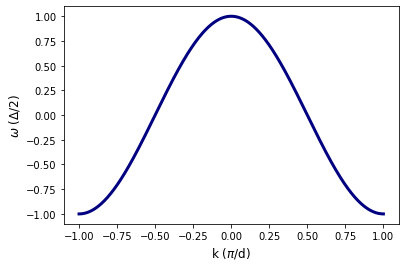

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of k/d values
k_over_d = np.linspace(-1, 1, 1000)

# Calculate the corresponding omega values
omega = np.cos(np.pi * k_over_d)

# Plot the function
plt.plot(k_over_d, omega, linewidth = 3, color = 'navy')

# Label the axes
plt.xlabel('k ($\pi$/d)', size = 12)
plt.ylabel(r'$\omega$ ($\Delta$/2)', size = 12)  # Omega symbol

# Show the plot
# plt.title('Plot of -cos(k/d)')
plt.grid(False)
plt.show()

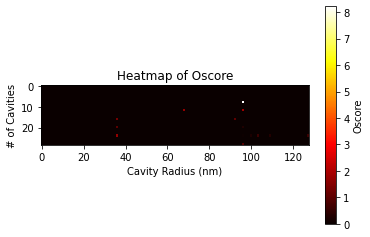

In [5]:
import numpy as np
import matplotlib.pyplot as plt

cav_rad = [
    [28, 96],
    [24, 127],
    [24, 109],
    [24, 103],
    [24, 100],
    [24, 96],
    [24, 36],
    [20, 96],
    [20, 36],
    [16, 96],
    [16, 92],
    [16, 36],
    [12, 96],
    [12, 68],
    [8, 96]
]

oscore = [
    0.9153,
    0.6316,
    0.3141,
    0.5908,
    0.2247,
    0.0337,
    1.7100,
    0.2738,
    1.0100,
    0.0190,
    1.0388,
    1.3123,
    1.8012,
    1.6813,
    8.2200
]

# Extracting data into separate arrays
radii = [x[0] for x in cav_rad]
intensities = [x[1] for x in cav_rad]

# Creating a 2D array for the heatmap
heatmap_data = np.zeros((max(radii) + 1, max(intensities) + 1))

for i in range(len(cav_rad)):
    heatmap_data[radii[i], intensities[i]] = oscore[i]

# Plotting the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.xlabel('Cavity Radius (nm)')
plt.ylabel('# of Cavities')
plt.title('Heatmap of Oscore')
plt.colorbar(label='Oscore')
plt.show()


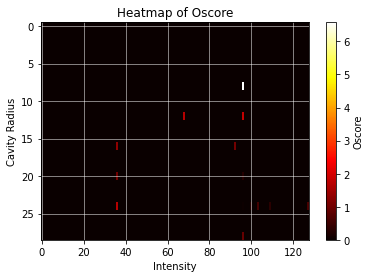

In [6]:
import numpy as np
import matplotlib.pyplot as plt

cav_rad = [
    [28, 96],
    [24, 127],
    [24, 109],
    [24, 103],
    [24, 100],
    [24, 96],
    [24, 36],
    [20, 96],
    [20, 36],
    [16, 96],
    [16, 92],
    [16, 36],
    [12, 96],
    [12, 68],
    [8, 96]
]

oscore = [
    0.9153,
    0.6316,
    0.3141,
    0.5908,
    0.2247,
    0.0337,
    1.7100,
    0.2738,
    1.0100,
    0.0190,
    1.0388,
    1.3123,
    1.8012,
    1.6813,
    8.2200
]

# Extracting data into separate arrays
radii = [x[0] for x in cav_rad]
intensities = [x[1] for x in cav_rad]

# Creating a 2D array for the heatmap
heatmap_data = np.zeros((max(radii) + 1, max(intensities) + 1))

for i in range(len(cav_rad)):
    heatmap_data[radii[i], intensities[i]] = oscore[i]

# Plotting the heatmap with enhanced visualization
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest', aspect='auto', vmin=0, vmax=max(oscore) * 0.8)
plt.xlabel('Intensity')
plt.ylabel('Cavity Radius')
plt.title('Heatmap of Oscore')
plt.colorbar(label='Oscore')
plt.grid(visible=True, linestyle='-', linewidth=0.5, color='white')
plt.show()

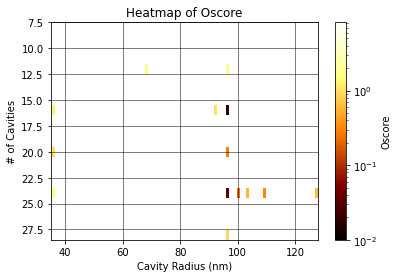

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

cav_rad = [
    [28, 96],
    [24, 127],
    [24, 109],
    [24, 103],
    [24, 100],
    [24, 96],
    [24, 36],
    [20, 96],
    [20, 36],
    [16, 96],
    [16, 92],
    [16, 36],
    [12, 96],
    [12, 68],
    [8, 96]
]

oscore = [
    0.9153,
    0.6316,
    0.3141,
    0.5908,
    0.2247,
    0.0337,
    1.7100,
    0.2738,
    1.0100,
    0.0190,
    1.0388,
    1.3123,
    1.8012,
    1.6813,
    8.2200
]

# Extracting data into separate arrays
radii = [x[0] for x in cav_rad]
intensities = [x[1] for x in cav_rad]

# Creating a 2D array for the heatmap
heatmap_data = np.zeros((max(radii) + 1, max(intensities) + 1))

for i in range(len(cav_rad)):
    heatmap_data[radii[i], intensities[i]] = oscore[i]

# Plotting the heatmap with enhanced visualization
plt.imshow(heatmap_data, cmap='afmhot', interpolation='nearest', aspect='auto', norm=LogNorm(vmin=0.01, vmax=max(oscore)))
plt.ylabel('# of Cavities')
plt.xlabel('Cavity Radius (nm)')
plt.xlim(35,128)
plt.ylim(28.5, 7.5)
plt.title('Heatmap of Oscore')
plt.colorbar(label='Oscore')
plt.grid(visible=True, linestyle='-', linewidth=0.5, color='black')
plt.show()

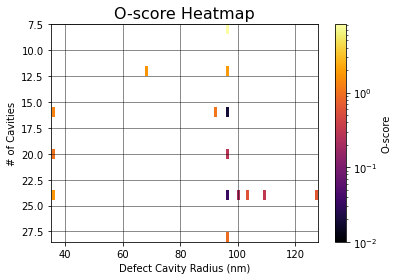

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

cav_rad = [
    [28, 96],
    [24, 127],
    [24, 109],
    [24, 103],
    [24, 100],
    [24, 96],
    [24, 36],
    [20, 96],
    [20, 36],
    [16, 96],
    [16, 92],
    [16, 36],
    [12, 96],
    [12, 68],
    [8, 96]
]

oscore = [
    0.9153,
    0.6316,
    0.3141,
    0.5908,
    0.2247,
    0.0337,
    1.7100,
    0.2738,
    1.0100,
    0.0190,
    1.0388,
    1.3123,
    1.8012,
    1.6813,
    8.2200
]

# Extracting data into separate arrays
radii = [x[0] for x in cav_rad]
intensities = [x[1] for x in cav_rad]

# Creating a 2D array for the heatmap
heatmap_data = np.zeros((max(radii) + 1, max(intensities) + 1))

for i in range(len(cav_rad)):
    heatmap_data[radii[i], intensities[i]] = oscore[i]

# Plotting the heatmap with enhanced visualization
plt.imshow(heatmap_data, cmap='inferno', interpolation='nearest', aspect='auto', norm=LogNorm(vmin=0.01, vmax=max(oscore)))
plt.ylabel('# of Cavities')
plt.xlabel('Defect Cavity Radius (nm)')
plt.xlim(35, 128)
plt.ylim(28.5, 7.5)
plt.title('O-score Heatmap', fontsize=16)  # Increase title font size
plt.colorbar(label='O-score')  # Explicitly set color bar ticks
plt.grid(visible=True, linestyle='-', linewidth=0.5, color='black', alpha=0.9)  # Adjust grid transparency
# plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

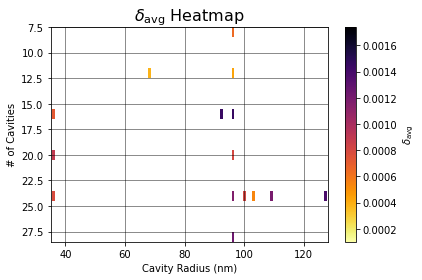

In [125]:
import numpy as np
import matplotlib.pyplot as plt

cav_rad = [
    [28, 96],
    [24, 127],
    [24, 109],
    [24, 103],
    [24, 100],
    [24, 96],
    [24, 36],
    [20, 96],
    [20, 36],
    [16, 96],
    [16, 92],
    [16, 36],
    [12, 96],
    [12, 68],
    [8, 96]
]

deltaavg = [
    0.00124,
    0.00138,
    0.00119,
    0.00054,
    0.00081,
    0.00116,
    0.00078,
    0.00080,
    0.00089,
    0.00145,
    0.00144,
    0.00072,
    0.00043,
    0.00038,
    0.00064,
]

# Extracting data into separate arrays
radii = [x[0] for x in cav_rad]
intensities = [x[1] for x in cav_rad]

# Creating a 2D array for the heatmap
heatmap_data = np.full((max(radii) + 1, max(intensities) + 1), np.nan)

for i in range(len(cav_rad)):
    heatmap_data[radii[i], intensities[i]] = deltaavg[i]

# Plotting the heatmap with enhanced visualization
plt.imshow(heatmap_data, cmap='inferno_r', interpolation='nearest', aspect='auto', vmin=0.0001, vmax=max(deltaavg)*1.2)
plt.ylabel('# of Cavities')
plt.xlabel('Cavity Radius (nm)')
plt.xlim(35, 128)
plt.ylim(28.5, 7.5)
plt.title('$\delta_{\mathrm{avg}}$ Heatmap', fontsize=16)
cbar = plt.colorbar(label=r'$\delta_{\mathrm{avg}}$')
plt.grid(visible=True, linestyle='-', linewidth=0.5, color='black', alpha=0.9)
plt.tight_layout()
plt.show()


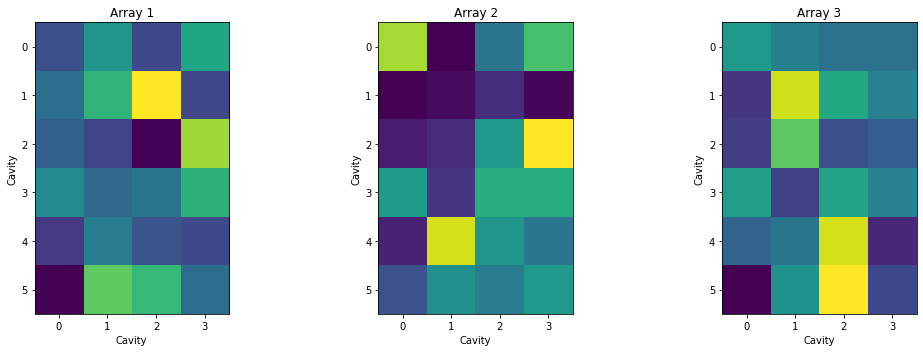

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have three arrays of complex numbers
# Let's call them array1, array2, and array3

# Generate sample data (replace this with your actual data)
array1 = np.random.randn(24) + np.random.randn(24) * 1j
array2 = np.random.randn(24) + np.random.randn(24) * 1j
array3 = np.random.randn(24) + np.random.randn(24) * 1j

# Convert complex numbers to magnitudes for visualization
magnitude1 = np.abs(array1)
magnitude2 = np.abs(array2)
magnitude3 = np.abs(array3)

# Reshape magnitudes to form a 2D array (assuming you want to visualize each array separately)
magnitude1 = magnitude1.reshape(6, 4)  # Adjust shape according to your cavity configuration
magnitude2 = magnitude2.reshape(6, 4)
magnitude3 = magnitude3.reshape(6, 4)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for array1
axs[0].imshow(magnitude1, cmap='viridis')
axs[0].set_title('Array 1')
axs[0].set_xlabel('Cavity')
axs[0].set_ylabel('Cavity')

# Plot for array2
axs[1].imshow(magnitude2, cmap='viridis')
axs[1].set_title('Array 2')
axs[1].set_xlabel('Cavity')
axs[1].set_ylabel('Cavity')

# Plot for array3
axs[2].imshow(magnitude3, cmap='viridis')
axs[2].set_title('Array 3')
axs[2].set_xlabel('Cavity')
axs[2].set_ylabel('Cavity')

plt.tight_layout()
plt.show()